# Step One 

In [1]:
import pandas as pd

df = pd.read_csv("./cybersecurity_attacks.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)




             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

# Step Two

In [2]:
# Return only duplicated rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Protocol, Packet Length, Packet Type, Traffic Type, Payload Data, Malware Indicators, Anomaly Scores, Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, User Information, Device Information, Network Segment, Geo-location Data, Proxy Information, Firewall Logs, IDS/IPS Alerts, Log Source]
Index: []

[0 rows x 25 columns]


# Step Three

In [3]:
df = df.fillna({
    'Malware Indicators' : 'IoC undetacted',
    'Alerts/Warnings' : 'Alert Unawarenessn',
    'Proxy Information' : 'anonymous',
    'Firewall Logs' : 'NO Data',
    'IDS/IPS Alerts' : 'Alert Unawarenessn'
})
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

# Step Four 

In [4]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts().reset_index().head(10))
    print("-" * 40)

Value counts for column: Timestamp
             Timestamp  count
0  2022-04-17 20:05:34      2
1  2022-06-11 14:28:15      2
2  2022-06-06 12:12:43      2
3  2023-06-27 11:02:56      1
4  2021-08-15 22:29:04      1
5  2022-07-20 13:28:50      1
6  2022-06-26 15:15:50      1
7  2020-09-30 21:35:31      1
8  2022-10-05 16:59:46      1
9  2021-05-29 15:33:51      1
----------------------------------------
Value counts for column: Source IP Address
  Source IP Address  count
0     103.216.15.12      1
1    78.199.217.198      1
2      63.79.210.48      1
3     163.42.196.10      1
4     71.166.185.76      1
5     198.102.5.160      1
6     97.253.103.59      1
7      11.48.99.245      1
8     49.32.208.167      1
9   114.109.149.113      1
----------------------------------------
Value counts for column: Destination IP Address
  Source IP Address  count
0     103.216.15.12      1
1    78.199.217.198      1
2      63.79.210.48      1
3     163.42.196.10      1
4     71.166.185.76      1
5  

In [5]:

# === Ask the user for filtering criteria ===
severity_level = input("Enter Severity Level (High/Medium/Low or leave blank): ").strip() or None
anomaly_score_min = input("Enter minimum Anomaly Score (or leave blank): ").strip()
traffic_type = input("Enter Traffic Type (or leave blank): ").strip() or None
packet_type = input("Enter Packet Type (or leave blank): ").strip() or None
protocol = input("Enter Protocol (TCP/UDP/ICMP or leave blank): ").strip() or None

# Convert numeric input safely
anomaly_score_min = float(anomaly_score_min) if anomaly_score_min else None

# === Filter ===
filtered_df = df.copy()

if severity_level is not None:
    filtered_df = filtered_df[filtered_df['Severity Level'] == severity_level]

if anomaly_score_min is not None:
    filtered_df = filtered_df[filtered_df['Anomaly Scores'] > anomaly_score_min]

if traffic_type is not None:
    filtered_df = filtered_df[filtered_df['Traffic Type'] == traffic_type]

if packet_type is not None:
    filtered_df = filtered_df[filtered_df['Packet Type'] == packet_type]

if protocol is not None:
    filtered_df = filtered_df[filtered_df['Protocol'] == protocol]

filtered_df.head(100)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Unawarenessn,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",anonymous,Log Data,Alert Unawarenessn,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",anonymous,NO Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NO Data,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-11-24 20:11:15,169.21.155.127,171.38.239.42,47513,9156,UDP,1455,Control,FTP,Rerum maiores sed. Saepe repudiandae dolore sa...,...,Ignored,High,Jivika Lad,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,Segment C,"Gudivada, Punjab",4.152.115.150,NO Data,Alert Unawarenessn,Firewall
96,2021-12-31 11:46:47,92.192.73.229,72.77.74.9,12215,50585,TCP,640,Control,HTTP,Facere dicta magni corrupti magnam. Aliquam es...,...,Blocked,Medium,Vedika Bawa,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_1 rv...,Segment C,"Maheshtala, Chhattisgarh",anonymous,Log Data,Alert Data,Server
97,2021-10-25 04:23:15,129.189.216.143,197.202.27.160,19199,27928,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,...,Ignored,High,Ira Kapadia,Mozilla/5.0 (compatible; MSIE 8.0; Windows 95;...,Segment C,"Tirunelveli, Gujarat",57.192.174.154,Log Data,Alert Data,Server
98,2022-04-25 20:26:30,60.223.224.39,218.187.232.192,26123,7023,ICMP,158,Data,HTTP,In repellendus modi ab. Dolore ex sequi perfer...,...,Ignored,Medium,Ivan Balan,Mozilla/5.0 (iPad; CPU iPad OS 9_3_5 like Mac ...,Segment B,"Raipur, Himachal Pradesh",45.57.200.181,NO Data,Alert Unawarenessn,Server


# Step Five 

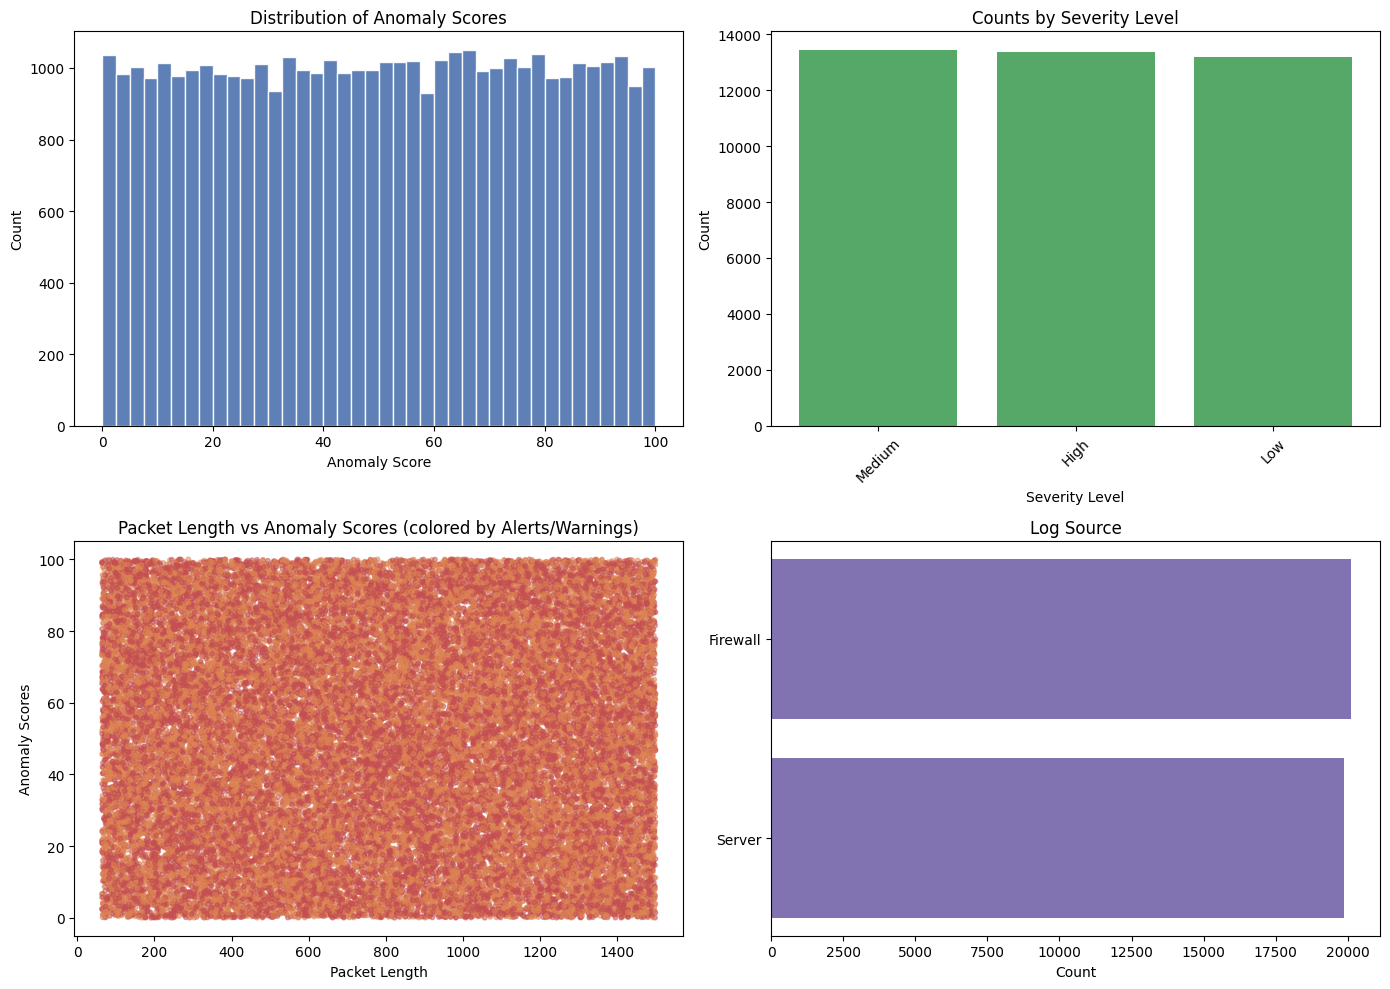

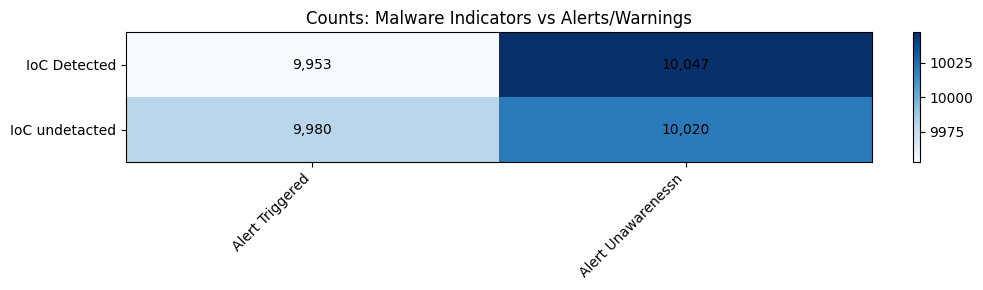

In [6]:
# Visualization cell using existing df, col, matplotlib (plt) and pandas (pd)
import matplotlib.pyplot as plt

# ensure Timestamp is datetime for any time-based visuals
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# 2x2 overview figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.ravel()

# 1) Histogram of Anomaly Scores
ax1.hist(df['Anomaly Scores'].dropna(), bins=40, color='#4C72B0', edgecolor='white', alpha=0.9)
ax1.set_title('Distribution of Anomaly Scores')
ax1.set_xlabel('Anomaly Score')
ax1.set_ylabel('Count')

# 2) Severity Level counts (bar)
severity_counts = df['Severity Level'].value_counts()
ax2.bar(severity_counts.index.astype(str), severity_counts.values, color='#55A868')
ax2.set_title('Counts by Severity Level')
ax2.set_xlabel('Severity Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# 3) Scatter: Packet Length vs Anomaly Scores colored by Alerts/Warnings
color_map = {'Alert Triggered': '#C44E52', 'Alert Unawarenessn': '#DD8452'}
colors = df['Alerts/Warnings'].map(color_map).fillna('#7F7F7F')
ax3.scatter(df['Packet Length'], df['Anomaly Scores'], c=colors, s=10, alpha=0.5)
ax3.set_title('Packet Length vs Anomaly Scores (colored by Alerts/Warnings)')
ax3.set_xlabel('Packet Length')
ax3.set_ylabel('Anomaly Scores')


# 4) Log Source
top_logs = df[col].value_counts()
ax4.barh(top_logs.index.astype(str), top_logs.values, color='#8172B2')
ax4.set_title('Log Source')
ax4.set_xlabel('Count')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

# Separate figure: heatmap of Malware Indicators vs Alerts/Warnings counts
ct = pd.crosstab(df['Malware Indicators'], df['Alerts/Warnings'])

fig, ax = plt.subplots(figsize=(10, max(3, 0.25 * len(ct))))
im = ax.imshow(ct.values, cmap='Blues', aspect='auto')

# ticks and labels
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')
ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)
ax.set_title('Counts: Malware Indicators vs Alerts/Warnings')

# annotate cells with values
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.iat[i, j]
        ax.text(j, i, f"{int(val):,}", ha='center', va='center', color='black')

plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.04)
plt.tight_layout()
plt.show()

# Step Six 

In [7]:

import pandas as pd

cols_to_onehot = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type']

df_oh = pd.get_dummies(
    df,
    columns=cols_to_onehot,
    prefix=cols_to_onehot,
    drop_first=False,    # keep all dummies; set True to drop one per feature
    dummy_na=True        # add a column for NaN
)


In [8]:

if 'num_cols' not in globals():
    num_cols = df.select_dtypes(include='number').columns.tolist()

overwrite = globals().get('overwrite', False)
threshold = globals().get('threshold', 3.0)

# Ensure df_out exists so later guarded assignments don't raise NameError
if 'df_out' not in globals():
    # create a copy of df if you want df_out to mirror df structure;
    # adjust to pd.DataFrame() if you prefer an empty placeholder.
    df_out = df.copy()

if not num_cols:
    raise ValueError('No numeric columns found in df to scale.')

means = df[num_cols].mean()
stds = df[num_cols].std(ddof=0).replace(0, 1.0)

X_scaled = (df[num_cols] - means) / stds

if overwrite:
    df[num_cols] = X_scaled
    if 'df_out' in globals():
        df_out[num_cols] = X_scaled
    display_cols = num_cols
else:
    new_cols = [f'{c}__std' for c in num_cols]
    df[new_cols] = X_scaled.values
    if 'df_out' in globals():
        df_out[new_cols] = X_scaled.values
    display_cols = new_cols + num_cols

df[display_cols].head()

,Source Port__std,Destination Port__std,Packet Length__std,Anomaly Scores__std,Source Port,Destination Port,Packet Length,Anomaly Scores
0,-0.094038,-0.836357,-0.669295,-0.743191,31225,17616,503,28.67
1,-0.847263,0.808376,0.943535,0.048054,17245,48166,1174,51.50
2,-0.870646,1.100929,-1.142808,1.292975,16811,53600,306,87.42
3,-0.697857,-0.033211,-0.952922,-1.189588,20018,32534,385,15.79
4,-1.446071,-0.350205,1.635778,-1.718818,6131,26646,1462,0.52


In [9]:
z_abs = X_scaled.abs()

outlier_cols = [f"{c}__is_outlier" for c in num_cols]
df[outlier_cols] = z_abs > threshold

if 'df_out' in globals():
    df_out[outlier_cols] = df[outlier_cols]

df['Any_Outlier'] = df[outlier_cols].any(axis=1)
df['max_z'] = z_abs.max(axis=1)
df['max_z_col'] = z_abs.idxmax(axis=1)

if 'df_out' in globals():
    df_out[['Any_Outlier', 'max_z', 'max_z_col']] = df[['Any_Outlier', 'max_z', 'max_z_col']]

print("Outlier counts (per column + any):")
print(df[outlier_cols + ['Any_Outlier']].sum())

# show top rows by max z (outliers first if any)
display(df.sort_values('max_z', ascending=False).head(10))


Outlier counts (per column + any):
Source Port__is_outlier         0
Destination Port__is_outlier    0
Packet Length__is_outlier       0
Anomaly Scores__is_outlier      0
Any_Outlier                     0
dtype: int64


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Destination Port__std,Packet Length__std,Anomaly Scores__std,Source Port__is_outlier,Destination Port__is_outlier,Packet Length__is_outlier,Anomaly Scores__is_outlier,Any_Outlier,max_z,max_z_col
9090,2021-09-03 14:16:13,41.70.83.128,219.141.37.74,65530,26538,TCP,584,Data,HTTP,Expedita magnam eos architecto perferendis quo...,...,-0.356020,-0.474601,1.050368,False,False,False,False,False,1.754273,Source Port
19453,2020-03-25 14:45:23,79.247.183.127,48.43.148.83,65530,49170,TCP,1315,Control,FTP,Adipisci at aliquid quos fuga reiciendis sit. ...,...,0.862429,1.282445,-0.696749,False,False,False,False,False,1.754273,Source Port
6356,2021-03-17 01:42:19,102.241.167.71,88.129.114.222,65527,54083,ICMP,1114,Data,HTTP,Ipsa reiciendis tenetur soluta dignissimos quo...,...,1.126932,0.799318,-1.532357,False,False,False,False,False,1.754111,Source Port
36136,2020-06-24 13:22:10,216.63.122.229,168.82.58.206,65525,27111,ICMP,105,Control,FTP,Veniam sapiente est. Amet ipsa dolorem in ipsa...,...,-0.325171,-1.625936,1.374422,False,False,False,False,False,1.754003,Source Port
35290,2022-04-03 15:42:16,42.28.10.178,52.139.189.140,65525,61460,TCP,1323,Control,DNS,Optio ratione reprehenderit ducimus aspernatur...,...,1.524091,1.301674,0.921093,False,False,False,False,False,1.754003,Source Port
13750,2020-07-31 01:10:57,91.30.20.104,68.4.190.93,65523,49868,TCP,190,Control,FTP,Non facilis atque rerum dolorem dolorem. Provi...,...,0.900007,-1.421628,-1.490074,False,False,False,False,False,1.753896,Source Port
33217,2021-08-25 15:49:51,17.131.204.93,215.157.194.144,65522,55341,UDP,281,Control,HTTP,Possimus quam animi beatae. Labore tempora eos...,...,1.194660,-1.202899,1.350161,False,False,False,False,False,1.753842,Source Port
737,2023-07-08 18:01:32,185.212.35.187,7.144.161.242,65521,45643,UDP,406,Control,FTP,Ipsam ullam illo debitis aspernatur fugiat. Do...,...,0.672544,-0.902446,-0.192820,False,False,False,False,False,1.753788,Source Port
12579,2021-12-01 17:00:42,185.159.44.164,25.220.77.122,65518,46802,ICMP,614,Data,DNS,Blanditiis iusto quam saepe. Vero iure animi l...,...,0.734942,-0.402493,0.980705,False,False,False,False,False,1.753626,Source Port
36804,2021-12-31 16:06:53,135.243.250.4,25.187.227.174,65518,54718,TCP,664,Control,FTP,Natus voluptas optio pariatur harum.\nPlaceat ...,...,1.161119,-0.282312,1.605939,False,False,False,False,False,1.753626,Source Port


Correlation matrix (selected columns -> non-numeric columns factorized):
                Protocol  Traffic Type  Packet Type  Anomaly Scores
Protocol        1.000000     -0.000862     0.008517       -0.001846
Traffic Type   -0.000862      1.000000    -0.000740        0.000092
Packet Type     0.008517     -0.000740     1.000000       -0.005984
Anomaly Scores -0.001846      0.000092    -0.005984        1.000000


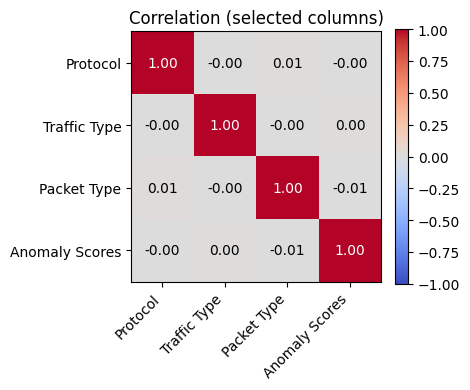

In [10]:
specific_cols = ['Protocol', 'Traffic Type', 'Packet Type', 'Anomaly Scores']  # set what you want

# keep only columns that exist in df
available_cols = [c for c in specific_cols if c in df.columns]
if not available_cols:
    raise ValueError(f"None of the requested columns found in df: {specific_cols}")

# build a subset and convert non-numeric columns to numeric codes so corr() uses them too
df_subset = df[available_cols].copy()
non_numeric = df_subset.select_dtypes(exclude='number').columns.tolist()
for col in non_numeric:
    codes = pd.factorize(df_subset[col], sort=True)[0]
    # factorize uses -1 for NaN; replace with pandas NA so corr ignores missing
    df_subset[col] = pd.Series(codes, index=df_subset.index).replace(-1, pd.NA).astype(float)

# compute correlation on the prepared subset
corr = df_subset.corr()
print("Correlation matrix (selected columns -> non-numeric columns factorized):")
print(corr)

# plot heatmap
n = len(corr.columns)
fig, ax = plt.subplots(figsize=(max(4, n * 1.2), max(4, n * 1.2)))
im = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='equal')

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)

# annotate
for i in range(n):
    for j in range(n):
        val = corr.iat[i, j]
        ax.text(j, i, f"{val:.2f}" if pd.notna(val) else "nan", ha='center', va='center',
                color='white' if abs(val) > 0.5 else 'black')

plt.title('Correlation (selected columns)')
plt.colorbar(im, ax=ax, fraction=0.046)
plt.tight_layout()
plt.show()

accuracy report:
0.3329
accuracy percentage = 33.29 %


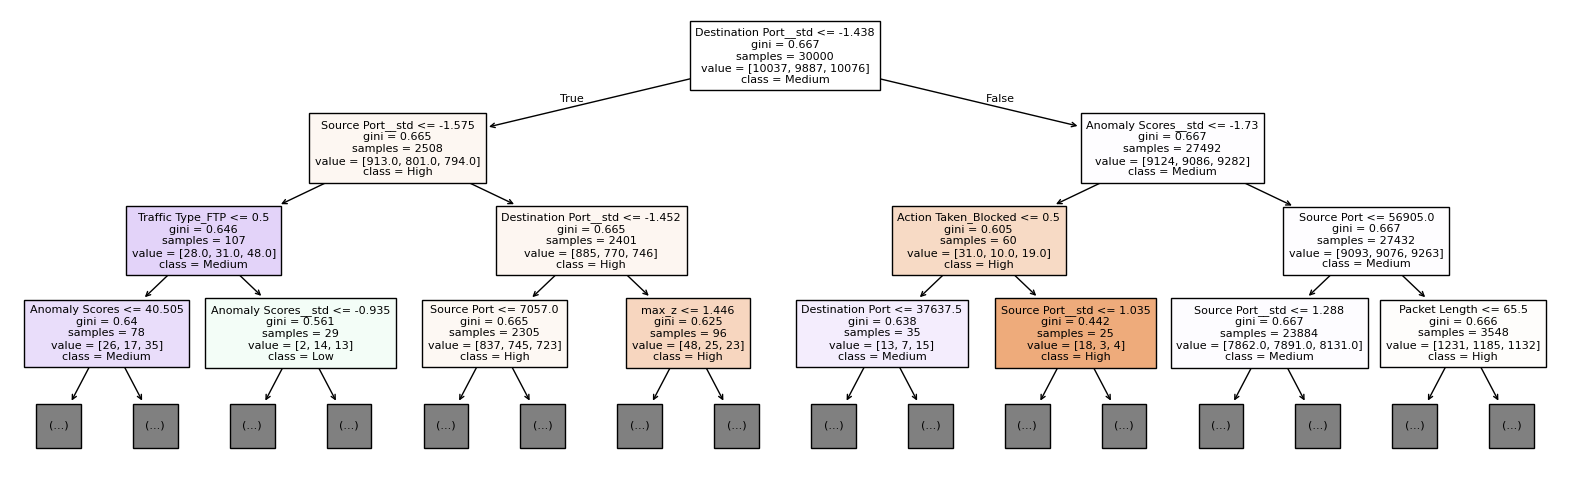

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

#choose target 
target = 'Severity Level'

if target not in df.columns:
    raise ValueError(f"target column {target} not found in dataset")

#identify y
y = df[target]

#feature selection 

num_cols = df.select_dtypes(include='number').columns.tolist() #All numeric column
cat_cols = [c for c in df.select_dtypes(include=object).columns if c != target] # obj_type columns excluding target 
cat_to_use = [c for c in cat_cols if df[c].nunique() <= 20] #limit cardinality

#build x with numeric + One_hot (feature selection)

x_part = []

if num_cols:
    x_part.append(df[num_cols])
if cat_to_use:#to convert categorical variables into a format suitable for machine learning(binary)
    x_part.append(pd.get_dummies(df[cat_to_use].astype(str), dummy_na=True))

#identify x
x = pd.concat(x_part, axis=1)

# train/test split
try:
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, stratify=y, random_state=42
    )
except ValueError:
    # fallback if stratify not possible (like 'single class')
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, random_state=42
    )

# train a small tree with (adjust max_depth as needed)

clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train) # for best split

# evaluate
y_pred = clf.predict(X_test)

print('accuracy report:')
print(metrics.accuracy_score(y_test, y_pred))
accuracy_percentage = metrics.accuracy_score(y_test, y_pred) * 100
print(f'accuracy percentage = {accuracy_percentage} %')

# plot a shallow version of the tree

plt.figure(figsize=(20, 6))
plot_tree(clf, max_depth=3, feature_names=x.columns, class_names=clf.classes_, filled=True, fontsize=8)
plt.show()


# Step eight -- Evaluation metics

Accuracy: 0.3329   Balanced Accuracy: 0.3307

Classification report:
              precision    recall  f1-score   support

        High       0.31      0.16      0.21      3345
         Low       0.38      0.01      0.03      3296
      Medium       0.34      0.82      0.48      3359

    accuracy                           0.33     10000
   macro avg       0.34      0.33      0.24     10000
weighted avg       0.34      0.33      0.24     10000


Per-class summary:


,precision,recall,f1,support
class,,,,
High,0.3146,0.1620,0.2139,3345
Low,0.3769,0.0149,0.0286,3296
Medium,0.3361,0.8151,0.4759,3359


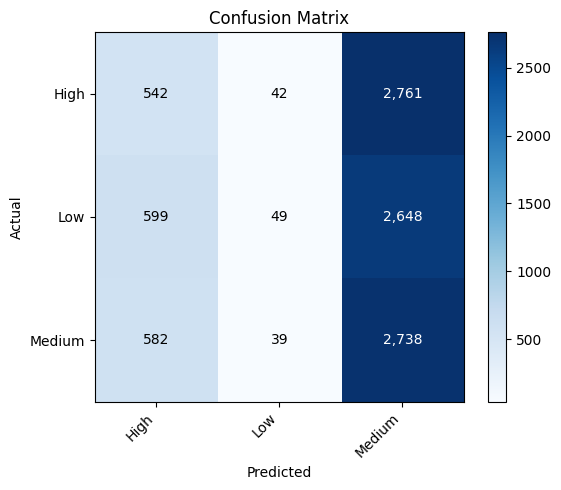

In [12]:
import numpy as np
from sklearn.utils.multiclass import unique_labels
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
)

# ensure predictions exist
if 'y_pred' not in globals():
    y_pred = clf.predict(X_test)

# determine classes present in test/pred
labels = unique_labels(y_test, y_pred)  # only labels actually present
classes_clf = getattr(clf, "classes_", np.unique(y_test))  # classifier classes (for predict_proba)

# Basic scores
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}   Balanced Accuracy: {bal_acc:.4f}\n")

# Classification report (use labels present)
print("Classification report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=[str(l) for l in labels], zero_division=0))

# Precision/Recall/F1 table
p, r, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=labels, zero_division=0)
summary = {
    "class": labels,
    "precision": np.round(p, 4),
    "recall": np.round(r, 4),
    "f1": np.round(f1, 4),
    "support": support
}
print("\nPer-class summary:")
display(pd.DataFrame(summary).set_index("class"))

# Confusion matrix plot (only for labels present)
cm = confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks(np.arange(len(labels))); ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]:,}", ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.colorbar(im, ax=ax, fraction=0.046)
plt.tight_layout()
plt.show()



# Step Nine -- linear regression  

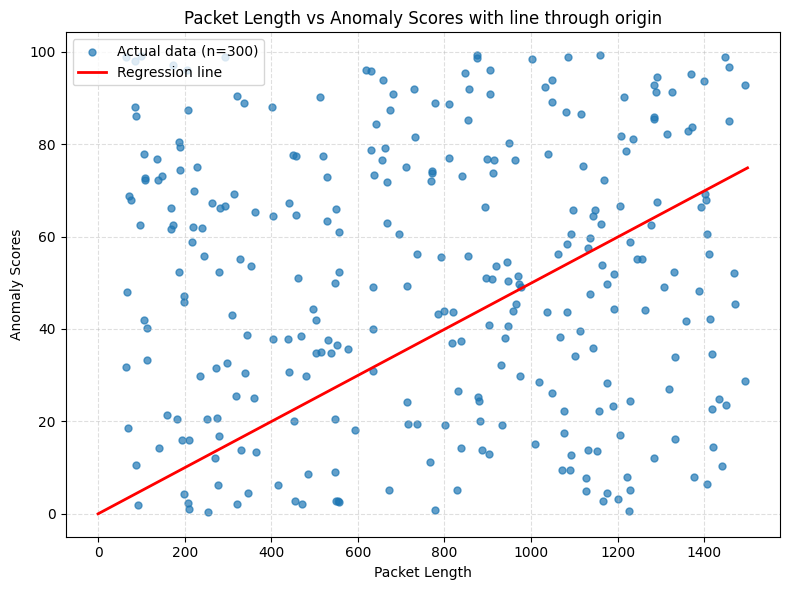

In [13]:
# Scatter with straight line through origin: Packet Length vs Anomaly Scores
import numpy as np
import matplotlib.pyplot as plt

# prepare data: drop rows where either value is missing
mask = df[['Packet Length', 'Anomaly Scores']].notna().all(axis=1)
df_sub = df.loc[mask, ['Packet Length', 'Anomaly Scores']].astype(float)

if df_sub.shape[0] < 2:
    print('Not enough data points to fit a line through origin (need >=2)')
else:
    x_all = df_sub['Packet Length'].values
    y_all = df_sub['Anomaly Scores'].values

    # if all x are zero, fallback to horizontal mean line
    if np.allclose(x_all, 0):
        m = 0.0
        def line_fn(x):
            return np.full_like(x, y_all.mean(), dtype=float)
        fit_label = f'Fallback: constant y={y_all.mean():.4f} (all x==0)'
    else:
        # fit y = m * x  (no intercept) via least squares
        m = (x_all * y_all).sum() / (x_all**2).sum()
        def line_fn(x):
            return m * x
        fit_label = f'Regression line'

    # Downsample points for plotting markers
    max_points = 300
    if len(df_sub) > max_points:
        df_plot = df_sub.sample(n=max_points, random_state=42)
    else:
        df_plot = df_sub

    x_plot = df_plot['Packet Length']
    y_plot = df_plot['Anomaly Scores']

    plt.figure(figsize=(8, 6))
    plt.scatter(x_plot, y_plot, s=25, alpha=0.7, label=f'Actual data (n={len(x_plot)})', color='#1f77b4')

    # Line from x=0 to max observed Packet Length
    x_line = np.linspace(0.0, max(0.0, df_sub['Packet Length'].max()), 200)
    y_line = line_fn(x_line)
    plt.plot(x_line, y_line, color='red', linewidth=2, label=fit_label)

    plt.xlabel('Packet Length')
    plt.ylabel('Anomaly Scores')
    plt.title('Packet Length vs Anomaly Scores with line through origin')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

## Alternative GUI: classifier chooser, feature selector, train/eval, predict

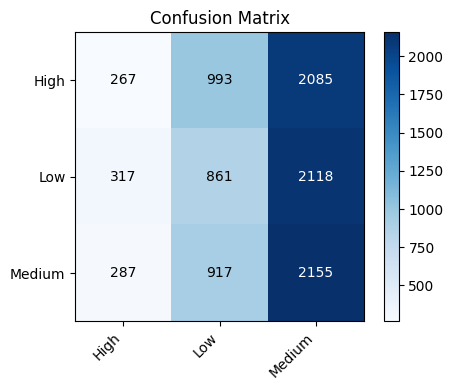

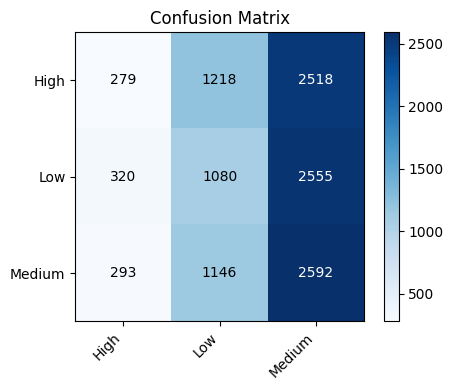

In [14]:
# Alternative interactive GUI: choose classifier, features, hyperparams, train/eval, predict row
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# derive candidate feature list from df
num_cols_all = df.select_dtypes(include='number').columns.tolist()
cat_cols_all = df.select_dtypes(include=object).columns.tolist()
feat_options = num_cols_all + cat_cols_all

# Widgets: classifier, features, hyperparams, test size
clf_choice = widgets.Dropdown(options=['DecisionTree', 'RandomForest', 'LogisticRegression'], value='DecisionTree', description='Classifier:')
feat_selector = widgets.SelectMultiple(options=feat_options, value=tuple(num_cols_all[:3]) if num_cols_all else tuple(cat_cols_all[:3]), description='Features:', rows=6)
target_default = 'Severity Level' if 'Severity Level' in df.columns else df.columns[0]
target_dd = widgets.Dropdown(options=[c for c in df.columns], value=target_default, description='Target:')
rf_n_estimators = widgets.BoundedIntText(value=100, min=10, max=1000, step=10, description='RF n_estim:')
max_depth = widgets.BoundedIntText(value=6, min=1, max=50, step=1, description='max_depth:')
test_size = widgets.FloatSlider(value=0.25, min=0.1, max=0.5, step=0.05, description='test_size:')
train2_btn = widgets.Button(description='Train & Eval (alt)', button_style='success')
out2 = widgets.Output(layout={'border': '1px solid #ddd'})

# Predict widgets: choose row index
row_idx2 = widgets.BoundedIntText(value=0, min=0, max=max(0, len(df)-1), description='Row idx:')
predict2_btn = widgets.Button(description='Predict Row (alt)')
predict2_out = widgets.Output(layout={'border': '1px solid #ddd'})

# store model and feature columns
gui2_state = {'model': None, 'cols': None}

def build_X_from_selected(df_in, selected):
    if not selected:
        raise ValueError('No features selected')
    selected = list(selected)
    parts = []
    num_sel = [c for c in selected if c in df_in.select_dtypes(include='number').columns]
    cat_sel = [c for c in selected if c in df_in.select_dtypes(include=object).columns]
    if num_sel:
        parts.append(df_in[num_sel].astype(float).fillna(0))
    if cat_sel:
        parts.append(pd.get_dummies(df_in[cat_sel].astype(str), dummy_na=True))
    X = pd.concat(parts, axis=1).fillna(0)
    return X

def on_train2_clicked(b):
    with out2:
        clear_output()
        sel = list(feat_selector.value)
        if not sel:
            print('Select at least one feature')
            return
        if target_dd.value not in df.columns:
            print('Target not in dataframe')
            return
        df_work = df.dropna(subset=[target_dd.value])  # ensure target exists
        X = build_X_from_selected(df_work, sel)
        y = df_work[target_dd.value].astype(str)
        if X.shape[0] < 5:
            print('Not enough rows to train after selecting features')
            return
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(test_size.value), stratify=y, random_state=42)
        except Exception:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(test_size.value), random_state=42)

        # choose classifier
        if clf_choice.value == 'DecisionTree':
            from sklearn.tree import DecisionTreeClassifier
            model = DecisionTreeClassifier(max_depth=int(max_depth.value) if max_depth.value>0 else None, random_state=42)
        elif clf_choice.value == 'RandomForest':
            from sklearn.ensemble import RandomForestClassifier
            model = RandomForestClassifier(n_estimators=int(rf_n_estimators.value), max_depth=int(max_depth.value) if max_depth.value>0 else None, random_state=42)
        else:
            from sklearn.linear_model import LogisticRegression
            model = LogisticRegression(max_iter=1000)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'Trained on {len(X_train)} rows, tested on {len(X_test)} rows')
        print(f'Accuracy: {acc:.4f}')
        print('\nClassification report:')
        print(classification_report(y_test, y_pred, zero_division=0))

        # confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=model.classes_ if hasattr(model, 'classes_') else sorted(y_test.unique()))
        import matplotlib.pyplot as plt
        import numpy as np
        classes = model.classes_ if hasattr(model, 'classes_') else np.unique(y_test)
        fig, ax = plt.subplots(figsize=(5, 4))
        im = ax.imshow(cm, cmap='Blues')
        ax.set_xticks(np.arange(len(classes))); ax.set_yticks(np.arange(len(classes)))
        ax.set_xticklabels(classes, rotation=45, ha='right'); ax.set_yticklabels(classes)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')
        plt.title('Confusion Matrix')
        plt.colorbar(im, ax=ax, fraction=0.046)
        plt.tight_layout()
        display(fig)

        # feature importance when available
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            fi = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(20)
            print('\nTop feature importances:')
            display(fi.reset_index().rename(columns={'index':'feature',0:'importance'}))

        gui2_state['model'] = model
        gui2_state['cols'] = X.columns.tolist()
        print('\nModel stored in gui2_state for prediction (alt).')

train2_btn.on_click(on_train2_clicked)

def on_predict2_clicked(b):
    with predict2_out:
        clear_output()
        model = gui2_state.get('model')
        cols = gui2_state.get('cols')
        if model is None or cols is None:
            print('Model not trained yet (alt). Click Train & Eval (alt).')
            return
        idx = int(row_idx2.value)
        if idx < 0 or idx >= len(df):
            print('Row index out of range')
            return
        row = df.iloc[[idx]]
        try:
            X_row = build_X_from_selected(row, feat_selector.value)
        except Exception as e:
            print('Could not build features for chosen row:', e)
            return
        X_aligned = pd.DataFrame(0, index=[0], columns=cols)
        for c in X_row.columns:
            if c in X_aligned.columns:
                X_aligned.loc[0, c] = X_row.iloc[0][c]
        pred = model.predict(X_aligned)
        print(f'Predicted: {pred[0]}')
        if hasattr(model, 'predict_proba'):
            try:
                proba = model.predict_proba(X_aligned)[0]
                classes = model.classes_
                print('Probabilities:')
                for k,v in zip(classes, proba):
                    print(f'  {k}: {v:.3f}')
            except Exception:
                pass

predict2_btn.on_click(on_predict2_clicked)

# layout and display
left = widgets.VBox([clf_choice, feat_selector, target_dd])
right = widgets.VBox([rf_n_estimators, max_depth, test_size, train2_btn])
train_area = widgets.HBox([left, right])
predict_area = widgets.HBox([row_idx2, predict2_btn])
display(widgets.VBox([widgets.Label('Alt GUI: choose features & classifier'), train_area, out2, widgets.Label('Predict single row (alt)'), predict_area, predict2_out]))